# The Mnist Dataset

## Introduction

What is the mnist dataset? The mnist dataset is a collection of images containing hand-written digits. These digits were compiled by the National Institute of Standards and Technology(NIST) in the United States of America. The dataset conains handwritten digits from 250 people. The dataset is in 4 different files. 

1. 60000 training images
2. 60000 labels for training images
3. 10000 test images
4. 10000 labels for the test images

The training set and labels are used to train the neural network to recognise the digits within the images.

## Importing the dataset

We must first import the dataset as the dataset is gzipped. Luckily in python we can use the gzip package to read it in.

In [1]:
#import gzip to open the files
import gzip

#Unzip the training images in the data folder and make sure you are reading them in as bytes
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

## Data structure of the files

The files that are now imported are read in as bytes. These files cannot be opened by regular programs. 

Below you can see that the files are in fact bytes.

In [2]:
type(file_content)

bytes

Now that we know they are bytes lets have a look and see what they look like.

In [3]:
#Get the first 4 bytes in the file and display them
file_content[0:4]

b'\x00\x00\x08\x03'

Now that we know that the files are being read in as bytes and have seen them we can now break down the file. We know from the mnis documentation, (Found here http://yann.lecun.com/exdb/mnist/) that the first 16 bytes in every file are reserved for information about the file. 

### Magic number

The magic number is the first 4 of these bytes and we can show this pretty easily.

In [4]:
int.from_bytes(file_content[0:4], byteorder='big')

2051

### Number of images

The next 4 bytes lets us know how many images there are in the dataset.

In [5]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

### Number of rows

The next 4 bytes is the number of rows.

In [6]:
int.from_bytes(file_content[8:12], byteorder='big')

28

### Number of columns

The final 4 of these first 16 bytes is the number of columns in the dataset.

In [7]:
int.from_bytes(file_content[12:16], byteorder='big')

28

### Little and big endian

You will notice in each of the above 4 cells there is "byteorder='big'" this meand that we are reading in the bytes in big endian. Big endian treats the farthest binary value to the left as the most significant value while the little endian treats the farthest binary value to the right as the most significant value. 

Our outputs match with our expected outputs from the mnist docs which means we are reading everything correctly so far.

## Displaying the images

Now that we have read the meta data it's time to focus on the images. we can easily check the first pixel of the image as it is the next byte. The pixels are coloured usng the 0-255 scale. On this scale 0 is black and 255 is white. So let's check the first pixel.

In [8]:
#This is the firs pizel in the image

int.from_bytes(file_content[16:17], byteorder='big')

0

As you can see the output is 0 and so this pizel is black.

We know that to create an image we need to shape the next 784 bytes in the file into a 2 dimentional array. To do that we need to first import numpy.

In [9]:
import numpy as np

#the ~ is a not to flip the bits
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)

Then we use matplotlib to render the image.

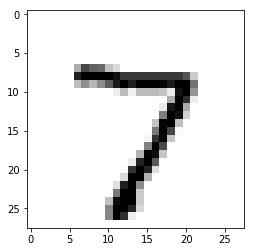

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')

## Rading in a label

Now that we have read in the image it is time to read in the labels.

In [11]:
# Adapted from: https://docs.python.org/3/library/gzip.html

import gzip

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()

In [12]:
int.from_bytes(labels[8:9], byteorder="big")

7

As you can see the output matches our image.

# References

1. [Link to lab notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/knn-iris.ipynb)